# Intro To Image Classification using Keras

Keras is a minimalisitc Python Deep Learning library that works on top of TensorFlow or Theano. It helps to quickly prototype Deep Learning models, and works seamlessly with both CPUs and GPUs. (You don't need to worry about scoping your variables for a CPU and GPU!)

Documentation for Keras is available here: https://keras.io/

The Keras community is very active. I encourage you to reach out if you have any questions on the Slack channel "keras.io" or the Gitter channel "keras".

### The MNIST Dataset
We are going to use the MNIST dataset (which contains scanned, handwritten digits from 0-9) for this demo. Here's why:

1) The images are normalized in size, and centered. Not much pre-processing is required.

2) The dataset is small enough to be trained on a CPU.

3) The dataset is the "Hello World" of Image Processing.

Citations:

For this tutorial I am referring to content from:

1) Andrej Karpathy's Standford Computer Vison Course http://cs231n.github.io/

2) Adam Getigey's blog, Machine Learning is Fun! https://medium.com/@ageitgey/

3) The Keras repository of examples https://github.com/fchollet/keras/blob/master/examples/

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import matplotlib as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# To visualize
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

In [4]:
# print versions
keras.__version__


'1.1.0'

In [5]:
# Load the MNIST data. Available directly in Keras package
(X_train, y_train), (X_test, y_test) = mnist.load_data()


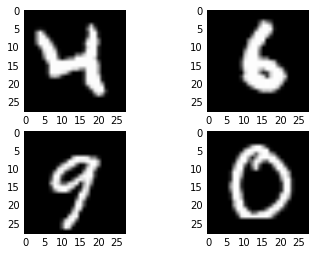

In [6]:
%matplotlib inline

# plot a few images
gray=plt.get_cmap('gray')

plt.subplot(221)
plt.imshow(X_train[20], cmap=gray)
plt.subplot(222)
plt.imshow(X_train[36], cmap=gray)
plt.subplot(223)
plt.imshow(X_train[45], cmap=gray)
plt.subplot(224)
plt.imshow(X_train[88], cmap=gray)

plt.show()

In [7]:
# Look at the shape of dataset
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [8]:
import pandas as pd

pd_image = pd.DataFrame([list(l) for l in X_train[0]])
pd_image

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show>

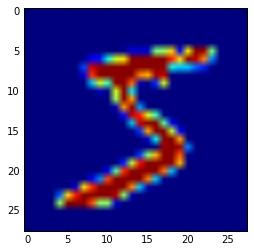

In [9]:
plt.imshow(X_train[0])
plt.show

## Fully Connected Network

Build a *fully connected model* for use as a benchmark

In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [11]:
np.random.seed(5)   # random seed for repro

In [12]:
# Flatten the 28*28 images into a flat vector
num_pixels = X_train.shape[1] * X_train.shape[2]
print (num_pixels)
NUM_PIXELS = num_pixels

784


In [13]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test  = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print(X_train.shape)

(60000, 784)


In [14]:
# normalize from 0-255 to 0-1, to help the optimizer converge faster
X_train = X_train / 255.
X_test  = X_test / 255.

In [15]:
# One-hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)
print(y_train.shape)
NUM_CLASSES = y_test.shape[1]   # num of output classes

(60000, 10)


In [16]:
## Create the Fully Connected Model
# Start with a Dense Layer

fullyconnected_model = Sequential()
# Dense Layer 1
fullyconnected_model.add(Dense(512,                     # output_dim (chosen as 512 here)
                              input_dim=NUM_PIXELS,     # input dim = 28*28 = 784
                              init='normal',            # init func for weights
                              activation='relu',
                              name='main_input'))

# Dense layer 2
fullyconnected_model.add(Dense(NUM_CLASSES,             # output: 10 classes (to predict from)
                              init='normal',            # init func 
                              activation='softmax'))    # softmax to predict probs

Compile the model with a loss function and optimizer. 

We'll use *categorical crossentropy* as loss func since this is multi-classification problem.

Optimizer we'll choose as Adam or SGD.
Metrics as accuracy

In [17]:
# compile model
fullyconnected_model.compile(loss='categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

Keras uses *scikit-learn* style methods to perform training and inference.

A _Fit_ function takes the following parameters as input: training dataset, training labels, validation_data (should be a tuple with validation data and labels), number of epochs, batchsize (number of samples per gradient update), and verbosity (0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch).

In [18]:
# Train/Fit the model
fullyconnected_model.fit(X_train, 
                        y_train,
                        validation_data=(X_test, y_test),
                        nb_epoch=10,
                        batch_size=100,
                        verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2579 - acc: 0.9258 - val_loss: 0.1270 - val_acc: 0.9627
Epoch 2/10
3s - loss: 0.1005 - acc: 0.9706 - val_loss: 0.0854 - val_acc: 0.9741
Epoch 3/10
3s - loss: 0.0646 - acc: 0.9806 - val_loss: 0.0763 - val_acc: 0.9756
Epoch 4/10
3s - loss: 0.0463 - acc: 0.9861 - val_loss: 0.0686 - val_acc: 0.9786
Epoch 5/10
3s - loss: 0.0337 - acc: 0.9898 - val_loss: 0.0728 - val_acc: 0.9774
Epoch 6/10
3s - loss: 0.0236 - acc: 0.9934 - val_loss: 0.0736 - val_acc: 0.9765
Epoch 7/10
3s - loss: 0.0181 - acc: 0.9951 - val_loss: 0.0732 - val_acc: 0.9786
Epoch 8/10
3s - loss: 0.0134 - acc: 0.9966 - val_loss: 0.0587 - val_acc: 0.9810
Epoch 9/10
3s - loss: 0.0100 - acc: 0.9976 - val_loss: 0.0762 - val_acc: 0.9789
Epoch 10/10
3s - loss: 0.0107 - acc: 0.9970 - val_loss: 0.0712 - val_acc: 0.9802


So we got a 98% accuracy, which is not bad! But it can be made better.

### Now let's build a Convolutional Neural Network

CNNs allow for translational invariance, by breaking down an input image into tiny, smaller images, then training these tiny images into a smaller neural network, and getting its weights, and sharing the weights across _the entire input image_.

See explanation at: 
**Adam Getigey's blog, Machine Learning is Fun!** https://medium.com/@ageitgey/

In [19]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

**Note:** Image ordering is different in Tensorflow and Theano. 

**Theano** uses ```[nb_sample, Channels, Height, Width]```.

**Tensorflow** uses ```[nb_sample, Height, Width, Channels]``` 

If your model doesn't converge, then check image_dim_ordering.

In [20]:
# Use Tensor Flow style image dim ordering
K.set_image_dim_ordering('tf')


In [21]:
BATCH_SIZE = 128
NB_CLASSES  = 10  # output classes
NB_EPOCH   = 10 

# Input image dim
IMG_ROWS, IMG_COLS = 28, 28

# Num of Conv filters to use
NB_FILTERS = 32  

# Pooling Size for Max Pooling
POOL_SIZE = (2, 2)

# Convolution Kernel Size
KERNEL_SIZE = (3, 3)

In [23]:
# load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape it: [Height, Width, Channels]
X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, 1).astype('float32')
X_test  = X_test.reshape (X_test.shape[0],  IMG_ROWS, IMG_COLS, 1).astype('float32')

print (X_train.shape)

(60000, 28, 28, 1)


In [24]:
# Normalize inputs from 0-255, to 0-1
X_train = X_train / 255
X_test  = X_test / 255

# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
NUM_CLASSES = y_test.shape[1]

print (NUM_CLASSES)

10


In [25]:
## Define the CNN model
cnn_model = Sequential()

# Conv layer 1
cnn_model.add(Convolution2D(NB_FILTERS,        # num filters
                           KERNEL_SIZE[0],     # 3x3 kernel
                           KERNEL_SIZE[1],
                           border_mode='valid',
                           input_shape=(IMG_ROWS, IMG_COLS, 1)))
# Activation 1
cnn_model.add(Activation('relu'))
# pooling layer of size POOL_SIZE
cnn_model.add(MaxPooling2D(pool_size=POOL_SIZE))

# Dropout - let's say 20% - to prevent overfitting
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Layer 2
cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))

# Last layer (#3): output 10 classes, one for each digit
cnn_model.add(Dense(NUM_CLASSES))
# activation: Softmax - for prediction
cnn_model.add(Activation('softmax'))

In [26]:
# Compile the model
cnn_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])



In [27]:
# Train/Fit the model
cnn_model.fit(X_train,
             y_train,
             validation_data=(X_test, y_test),
             nb_epoch=1,              # Just to test if everything is Ok
             batch_size=BATCH_SIZE,
             verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
25s - loss: 0.2112 - acc: 0.9382 - val_loss: 0.0832 - val_acc: 0.9737


Just a single epoch of training gets us 97.5% accuracy!

### Let's visualize the model

See here for more detail:
https://github.com/parambharat/sdcnd_helpers/blob/master/image_processing/Image_processing_tutorial.ipynb


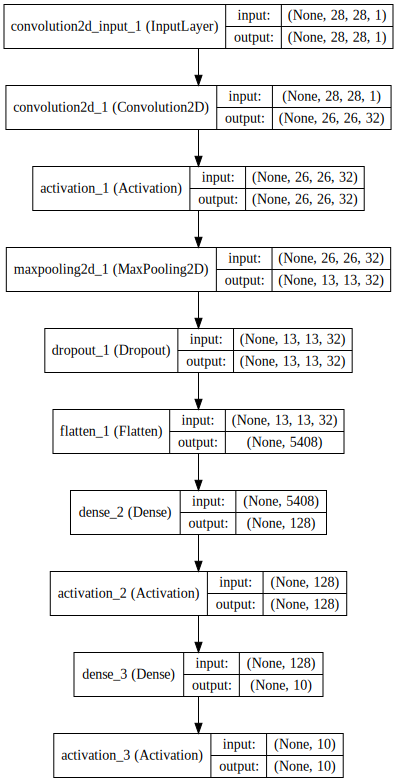

In [28]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(cnn_model, 
                show_shapes=True).create(prog='dot', format='svg'))

In [31]:
SVG(model_to_dot(cnn_model, 
                show_shapes=True).create(prog='dot', format='svg'))

NameError: name 'model_to_dot' is not defined